# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

The exchange rate between the US Dollar (USD) and the Indonesian Rupiah (IDR) is a critical economic indicator that affects various sectors of Indonesia's economy, including import-export trade, foreign investment inflows, and the overall economic stability of the country. Fluctuations in this exchange rate can significantly impact businesses and investors who engage in international transactions.

Given the importance of the USD to IDR exchange rate, **How do fluctuations in the USD to IDR exchange rate impact financial forecasting and decision-making for businesses involved in international trade with Indonesia?** Understanding these dynamics is crucial for financial planners, investors, and business leaders who rely on accurate predictions of currency movements to mitigate risks and maximize returns.

Web scraping is required because historical exchange rate data is typically not available in a ready-to-use format for analysis. By scraping this data from financial websites that track and record daily exchange rates, we can obtain a comprehensive dataset that allows for a detailed time-series analysis.

The web scraping will provide:
- Daily USD to IDR exchange rates over a specified historical period.
- Dates corresponding to each exchange rate, allowing for time-series analysis.

This data will be used to:
- Plot the historical trends of the exchange rate.
- Identify any patterns, anomalies, or significant fluctuations in the exchange rate.
- Calculate statistical metrics that can help in forecasting future rates.
- Business Implications of the Results

The results from this analysis can be used by businesses and investors to:
- Enhance financial planning by understanding the trends and patterns in exchange rate fluctuations.
- Improve risk management strategies by identifying potential periods of high volatility.
- Make informed decisions regarding timing for currency exchange, investments, or pricing of products and services in international markets.

By leveraging the insights gained from the historical data analysis, businesses can position themselves more favorably in the international market, optimizing their operations in response to currency trends.

## Requesting the Data and Creating a BeautifulSoup

Let's start by requesting the webpage using the `get` method from the `requests` library.

In [3]:
import requests

url_get = requests.get("https://www.exchange-rates.org/exchange-rate-history/usd-idr")

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [4]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [5]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [6]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

To extract the desired information, we need to find the right key using the .find() method. We can explore the HTML structure using .prettify().

In [7]:
table = soup.find("table", attrs={"class": "history-rates-data"})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2024-04-26">
     April 26, 2024
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2024-04-26">
     2024-4-26
    </a>
   </td>
   <td>
    <span class="w">
     <span class="n


In [8]:
# Find a pattern to locate the table values
table.find_all("tr")[:5]

[<tr>
 <th class="ltr-bidi-fix">Date</th>
 <th class="ltr-bidi-fix">US Dollar to Indonesian Rupiah</th>
 </tr>,
 <tr>
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-26">April 26, 2024</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2024-04-26">2024-4-26</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>16,241</span></span>
 <span class="n"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>16,241</span></span>
 </td>
 </tr>,
 <tr class="odd">
 <td>
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-25">April 25, 2024</a>
 <a class="n" href="/exchange-rate-history/usd-idr-2024-04-25">2024-4-25</a>
 </td>
 <td>
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>16,193</span></s

Next, we need to find the row length.

In [9]:
# Check the row length
rows = table.find_all('a', class_='w')
row_length = len(rows)
row_length

130

The Scrapping Process

> You can use a for loop to perform the scraping process in various ways depending on the HTML structure of the website you want to scrap and the information you want to retrieve.

In [10]:
# Re-check the column values
table.find_all('a', class_='w')

[<a class="w" href="/exchange-rate-history/usd-idr-2024-04-26">April 26, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-25">April 25, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-24">April 24, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-23">April 23, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-22">April 22, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-19">April 19, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-18">April 18, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-17">April 17, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-16">April 16, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-15">April 15, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-12">April 12, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-11">April 11, 2024</a>,
 <a 

In [11]:
# Re-check the column values
table.find_all("span", class_='w')

[<span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>16,241</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>16,193</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>16,212</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>16,143</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>16,238</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>16,218</span></span>

In [12]:
temp = []  # Initialize the list to store the data

for i in range(0, row_length):  # Loop through each row, starting from 0

    # Since each of these data points appears twice under different classes, I choose one format ('w') to consistently use for extraction.
    # Get the date from the 'a' tag with class 'w' in the current row 
    date = table.find_all('a', class_='w')[i].text.strip()  # Extract and clean the text

    # Get the exchange rate from the 'span' tag with class 'w' in the current row
    rate = table.find_all("span", class_='w')[i].text.strip()

    # Append the extracted date and rate to the list
    temp.append((date, rate))

# Print the first few elements to verify
temp

[('April 26, 2024', '$1 = Rp16,241'),
 ('April 25, 2024', '$1 = Rp16,193'),
 ('April 24, 2024', '$1 = Rp16,212'),
 ('April 23, 2024', '$1 = Rp16,143'),
 ('April 22, 2024', '$1 = Rp16,238'),
 ('April 19, 2024', '$1 = Rp16,218'),
 ('April 18, 2024', '$1 = Rp16,210'),
 ('April 17, 2024', '$1 = Rp16,243'),
 ('April 16, 2024', '$1 = Rp16,303'),
 ('April 15, 2024', '$1 = Rp16,083'),
 ('April 12, 2024', '$1 = Rp16,118'),
 ('April 11, 2024', '$1 = Rp16,011'),
 ('April 10, 2024', '$1 = Rp16,001'),
 ('April 9, 2024', '$1 = Rp15,892'),
 ('April 8, 2024', '$1 = Rp15,912'),
 ('April 5, 2024', '$1 = Rp15,888'),
 ('April 4, 2024', '$1 = Rp15,896'),
 ('April 3, 2024', '$1 = Rp15,942'),
 ('April 2, 2024', '$1 = Rp15,952'),
 ('April 1, 2024', '$1 = Rp15,951'),
 ('March 29, 2024', '$1 = Rp15,880'),
 ('March 28, 2024', '$1 = Rp15,891'),
 ('March 27, 2024', '$1 = Rp15,901'),
 ('March 26, 2024', '$1 = Rp15,821'),
 ('March 25, 2024', '$1 = Rp15,784'),
 ('March 22, 2024', '$1 = Rp15,814'),
 ('March 21, 2024',

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

In [13]:
# Reversing the list to arrange the data chronologically from the earliest to the most recent date
temp = temp[::-1]
temp

[('October 30, 2023', '$1 = Rp15,854'),
 ('October 31, 2023', '$1 = Rp15,919'),
 ('November 1, 2023', '$1 = Rp15,899'),
 ('November 2, 2023', '$1 = Rp15,852'),
 ('November 3, 2023', '$1 = Rp15,589'),
 ('November 6, 2023', '$1 = Rp15,577'),
 ('November 7, 2023', '$1 = Rp15,651'),
 ('November 8, 2023', '$1 = Rp15,625'),
 ('November 9, 2023', '$1 = Rp15,715'),
 ('November 10, 2023', '$1 = Rp15,694'),
 ('November 13, 2023', '$1 = Rp15,683'),
 ('November 14, 2023', '$1 = Rp15,459'),
 ('November 15, 2023', '$1 = Rp15,519'),
 ('November 16, 2023', '$1 = Rp15,484'),
 ('November 17, 2023', '$1 = Rp15,424'),
 ('November 20, 2023', '$1 = Rp15,389'),
 ('November 21, 2023', '$1 = Rp15,517'),
 ('November 22, 2023', '$1 = Rp15,656'),
 ('November 23, 2023', '$1 = Rp15,633'),
 ('November 24, 2023', '$1 = Rp15,540'),
 ('November 27, 2023', '$1 = Rp15,505'),
 ('November 28, 2023', '$1 = Rp15,352'),
 ('November 29, 2023', '$1 = Rp15,459'),
 ('November 30, 2023', '$1 = Rp15,559'),
 ('December 1, 2023', '$1

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [14]:
import pandas as pd

exchange_rate = pd.DataFrame(temp, columns = ("Date", "Exchange Rate"))
exchange_rate.head()

,Date,Exchange Rate
0,"October 30, 2023","$1 = Rp15,854"
1,"October 31, 2023","$1 = Rp15,919"
2,"November 1, 2023","$1 = Rp15,899"
3,"November 2, 2023","$1 = Rp15,852"
4,"November 3, 2023","$1 = Rp15,589"


### Data Cleansing


In [15]:
# Convert the list of tuples into a DataFrame
exchange_rate = pd.DataFrame(temp, columns=("Date", "Exchange Rate"))

# Parse the 'Date' column to datetime
exchange_rate['Date'] = pd.to_datetime(exchange_rate['Date'])

# Clean the 'Exchange Rate' column and convert it to float
exchange_rate['Exchange Rate'] = exchange_rate['Exchange Rate'].str.replace('$1 = Rp', '').str.replace(',', '').astype(float)

exchange_rate.head()

,Date,Exchange Rate
0,2023-10-30,15854.0
1,2023-10-31,15919.0
2,2023-11-01,15899.0
3,2023-11-02,15852.0
4,2023-11-03,15589.0


In [16]:
# Verify data types
print(exchange_rate.dtypes)

Date             datetime64[ns]
Exchange Rate           float64
dtype: object


In [17]:
# Check for any missing values
print(exchange_rate.isnull().sum())

Date             0
Exchange Rate    0
dtype: int64


In [18]:
# Set 'Date' as the index of the DataFrame
exchange_rate.set_index('Date', inplace=True)

# Display the first few rows of the cleaned DataFrame
print(exchange_rate)

            Exchange Rate
Date                     
2023-10-30        15854.0
2023-10-31        15919.0
2023-11-01        15899.0
2023-11-02        15852.0
2023-11-03        15589.0
...                   ...
2024-04-22        16238.0
2024-04-23        16143.0
2024-04-24        16212.0
2024-04-25        16193.0
2024-04-26        16241.0

[130 rows x 1 columns]


### Data Visualization

You can do start with making the data visualization to assist yourself understand the pattern, analyze it and provide a conclusion

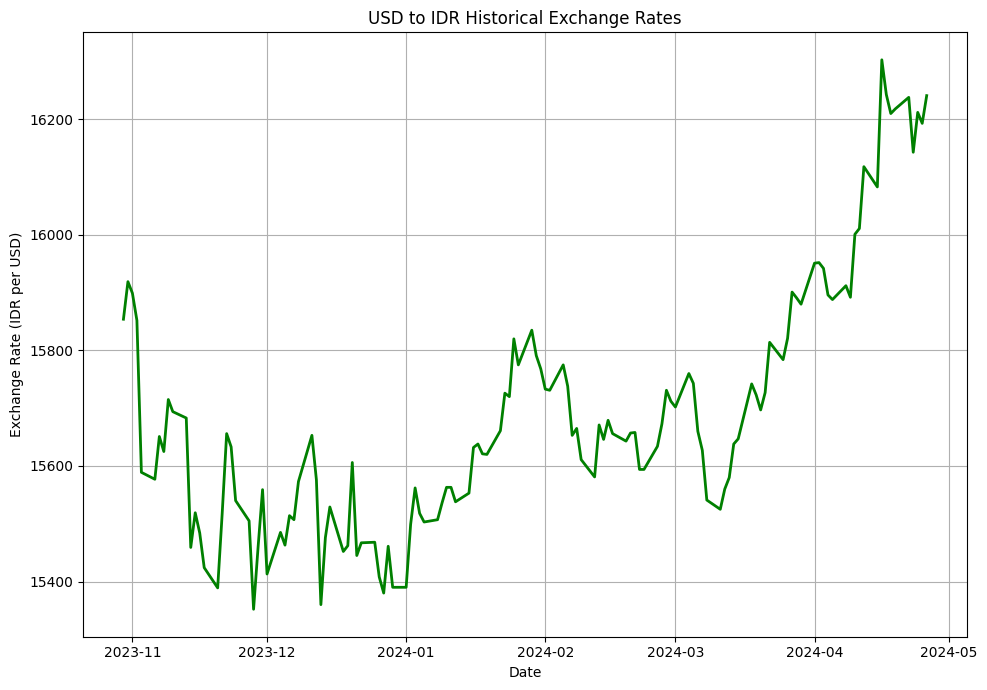

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  # Set the size of the plot
plt.plot(exchange_rate.index, exchange_rate['Exchange Rate'], marker='', color='green', linewidth=2)

plt.title('USD to IDR Historical Exchange Rates')  # Add a title
plt.xlabel('Date')  # Label the x-axis
plt.ylabel('Exchange Rate (IDR per USD)')  # Label the y-axis
plt.grid(True)  # Add a grid for easier reading
plt.tight_layout()  # Adjust the layout

# Display the plot
plt.show()


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

### Analysis:
The chart shows the USD to IDR exchange rate over approximately a six-month period from November 2023 to April 2024. The following observations and analysis can be drawn from the trend in the chart:

- Overall Upward Trend: There is a clear upward trend in the exchange rate, indicating a depreciation of the IDR against the USD over the observed period. This trend could be indicative of a wider economic trend, such as inflation within Indonesia or strengthening of the USD in global markets.
- Volatility: There are periods of increased volatility, notably at the start of the period (around November 2023) and towards the end (around April 2024). Such volatility can be a concern for businesses that rely on stable exchange rates for cost planning and pricing strategies.
- Sharp Increases: Particularly in April 2024, there's a sharp increase in the exchange rate. Such movements may be attributed to economic events or policy changes and can significantly impact businesses with exposure to IDR.

### Conclusion:
- Financial Planning: Businesses engaged in trade with Indonesia need to account for a possible continued depreciation of the IDR. Long-term contracts priced in USD may become more costly for Indonesian partners, and this should be factored into any new agreements or financial forecasts.
- Risk Management: The observed volatility underscores the need for robust risk management strategies. Businesses might consider hedging techniques such as forward contracts to mitigate the risk posed by fluctuations in the exchange rate.
- Decision-Making: For companies involved in import-export with Indonesia, this data suggests a careful review of pricing and cost strategies. Importers in Indonesia might find their costs rising and may need to adjust prices accordingly. Exporters to Indonesia might experience increased demand as their products become relatively cheaper for Indonesian buyers.
- Market Opportunities: Investors may see opportunities in market movements like this. For instance, a strengthening USD could attract foreign investment into Indonesian assets, assuming investors expect the IDR to stabilize or appreciate in the future.
- Operational Adjustments: Companies might also need to adjust operations, possibly sourcing more goods locally within Indonesia to avoid currency risk or diversifying the currency exposure in their financial operations.

In light of this analysis, it is advisable for stakeholders to stay informed of macroeconomic indicators and to remain agile, adjusting financial strategies to the dynamic currency landscape. Business leaders should closely monitor not just the exchange rates but also the underlying factors that could be influencing these trends, such as Indonesia's central bank policies, inflation rates, and global economic conditions.


### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.